# Evalution Algorithm, Andrejs Sorstkins - Task 1

## Part 1: Create Library 

Function to plot graph for assignment

In [ ]:
# plot graf function

import numpy as np
import matplotlib.pyplot as plt

# arrayFloat - array of fitneses of individuals in each generation, numberOFGenerations - number of generations

def plotGraph(arrayFloat, numberOFGenerations):
    x = np.arange(0, numberOFGenerations)
    y = np.array(arrayFloat)
    plt.title("Line graph")
    plt.xlabel("Generations")
    plt.ylabel("Fitnes of generations")
    plt.plot(x, y, color ="green")
    plt.show(

There will be step bt step implementation of Steady-State Binary Genetic Algorithm in future cells

## First step: Generate population, genearte random genotype

In [329]:
import random

genotypeRow = 1
genotypeColumn = 8

def generatePopulation(populationSize, row, column):
    
    populationArray = []
    for child in range(populationSize):
        newColumn = []
        for x in range(row):
            newRow = []
            for y in range(column):
                if random.randint(0,100) < random.randint(0,100):
                    newRow.append(0)
                else:
                    newRow.append(1)
            newColumn.append(newRow)
        populationArray.append(newColumn)
    print(populationArray)
    return populationArray

    
generatePopulation(2, genotypeRow, genotypeColumn)

[[[1, 1, 1, 1, 1, 1, 1, 0]], [[0, 1, 1, 1, 0, 0, 1, 0]]]


[[[1, 1, 1, 1, 1, 1, 1, 0]], [[0, 1, 1, 1, 0, 0, 1, 0]]]

Goal of this app to create binary image of "G A" word

In [ ]:
# Fitness goal 

# 00011110000011000
# 00100001000101100
# 01000000001000110
# 00100111001111110
# 00011101001000010

goal = [
       [0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0],
       [0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0],
       [0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0],
       [0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0],
       [0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0]
]

test = [
       [0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0],
       [0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0],
       [0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0],
       [0,0,1,0,0,0,1,1,0,0,1,1,1,1,1,1,0],
       [0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0]
]


## Second step: Create fitness function which will be evaluating current genotype 

In [ ]:
def estimateFitness(target, row, column):

    fitnessValueNumerator  = 0
    fitnessValueDenominator = column * row

    for y in range(row):
        for x in range(column):
            if target[y][x] == goal[y][x]:
                fitnessValueNumerator = fitnessValueNumerator + 1



    if fitnessValueNumerator == 0:
        return 0
    else:
        return fitnessValueNumerator / fitnessValueDenominator
                
        



In [ ]:
print(estimateFitness(test, genotypeRow, genotypeColumn))

## Third Step: Selection Individuals, it will return 2 best individuals

In [ ]:
import collections
    
def selection(population, firstIndividum, secondIndividum):
    populationEstimation = {};
    counter = 0;

    for individual in population:
        individualFitness = estimateFitness(individual, genotypeRow, genotypeColumn)
        populationEstimation[counter] = individualFitness;
        counter = counter + 1;
    
    sorted_x = sorted(populationEstimation.items(), key=lambda kv: kv[1], reverse=True)
    
    for x in sorted_x:
        print("///////////////")
        print(x)
    
    return population[sorted_x[firstIndividum][0]], population[sorted_x[secondIndividum][0]]
    
        

In [ ]:


female, male = selection(generatePopulation(7, genotypeRow, genotypeColumn), 0, 1)

## Fourth Step: Crossover of selected individuals, one point crossover

In [ ]:


def crossover(female, male):
    
    offspring = []
    cut = random.randint(1, genotypeColumn-1) # randomy select cut point
    
#     print("Cut point: " + str(cut))
#     print("Female: ")
#     for row in female:
#         print("1: " + str(row))
#     print("Male: ")
#     for row in male:
#         print("1: " + str(row))
    
    for x in range(genotypeRow):
        offspringRow = female[x][0:cut] + male[x][cut:]
        offspring.append(offspringRow)
    
#     print("Offspring: ")
#     for row in offspring:
#         print("1: " + str(row))

    return offspring
        
        
        
        
        
    

In [ ]:
crossover(female, male)

## Fifth Step: Mutation one of the individual, program will mutate n number of random points

In [ ]:
def mutation(offspring, numberMutationPoints):
    
    for x in range(numberMutationPoints):
        randomRowMutationPoint = random.randint(0, genotypeRow) # randomy select cut point
        randomColumnMutationPoint = random.randint(0, genotypeColumn) # randomy select cut point
        
        print("Point, Row " + str(randomRowMutationPoint) + " Column " + str(randomColumnMutationPoint))
        
        if offspring[randomRowMutationPoint][randomColumnMutationPoint] == 0:
            offspring[randomRowMutationPoint][randomColumnMutationPoint] = 1
        else:
            offspring[randomRowMutationPoint][randomColumnMutationPoint] = 0
    
    return offspring
    

In [ ]:
    print("offspring Before : ")
    for row in female:
        print("1: " + str(row))
        
    after = mutation(female, 3)
    print("offspring After : ")
    print(after)

    for row in after:
        print("1: " + str(row))

# Steady-State Binary GA in OOP style

In [ ]:
import random
import collections

class steadyStateBinaryGA:

    def __init__(self, populationSize, genotypeRow, genotypeColumn, goal):
        self.populationSize = populationSize
        self.genotypeRow = genotypeRow
        self.genotypeColumn = genotypeColumn
        self.populationArray = []
        self.populationEstimation = {}
        self.goal = goal
        self.generateRandomPopulation()

    def generateRandomPopulation(self):

        for child in range(self.populationSize):
            newColumn = []
            for x in range(self.genotypeRow):
                newRow = []
                for y in range(self.genotypeColumn):
                    if random.randint(0, 100) < random.randint(0, 100):
                        newRow.append(0)
                    else:
                        newRow.append(1)
                newColumn.append(newRow)
            self.populationArray.append(newColumn)
        print(self.populationArray)
        return self.populationArray

    def estimateFitness(self, target):

        fitnessValueNumerator = 0
        fitnessValueDenominator = self.genotypeColumn * self.genotypeRow

        for y in range(self.genotypeRow):
            for x in range(self.genotypeColumn):
                if target[y][x] == self.goal[y][x]:
                    fitnessValueNumerator = fitnessValueNumerator + 1

        if fitnessValueNumerator == 0:
            return 0
        else:
            return fitnessValueNumerator / fitnessValueDenominator

    def selection(self, firstIndividum, secondIndividum):
        counter = 0

        for individual in self.populationArray:
            individualFitness = self.estimateFitness(individual)
            self.populationEstimation[counter] = individualFitness
            counter = counter + 1

        self.populationEstimation = sorted(self.populationEstimation.items(), key=lambda kv: kv[1], reverse=True)
        female = self.populationArray[self.populationEstimation[firstIndividum][0]]
        male = self.populationArray[self.populationEstimation[secondIndividum][0]]
        self.populationEstimation = self.Convert(self.populationEstimation)
        return female, male

    def crossover(self, female, male):

        offspring = []
        cut = random.randint(1, self.genotypeColumn - 1)  # randomy select cut point

        for x in range(self.genotypeRow):
            offspringRow = female[x][0:cut] + male[x][cut:]
            offspring.append(offspringRow)

        return offspring

    def mutation(self, offspring, numberMutationPoints):

        for x in range(numberMutationPoints):
            randomRowMutationPoint = random.randint(0, self.genotypeRow - 1)  # randomy select cut point
            randomColumnMutationPoint = random.randint(0, self.genotypeColumn - 1)  # randomy select cut point

            if offspring[randomRowMutationPoint][randomColumnMutationPoint] == 0:
                offspring[randomRowMutationPoint][randomColumnMutationPoint] = 1
            else:
                offspring[randomRowMutationPoint][randomColumnMutationPoint] = 0

        return offspring

    def checkWorst(self, offspring):
        targetFitness = self.estimateFitness(offspring)
        currentWorstKey = list(self.populationEstimation.keys())[-1]
        currentWorstValue = self.populationEstimation[currentWorstKey]
        if currentWorstValue >= targetFitness:
            return True
        else:
            return False

    def replaceWorst(self, offspring):
        currentWorstKey = list(self.populationEstimation.keys())[-1]
        self.populationArray[currentWorstKey] = offspring

    def getBestOffspring(self):
        bestOffspringKey = list(self.populationEstimation.keys())[0]
        return self.populationArray[bestOffspringKey], self.populationEstimation[bestOffspringKey]

    def Convert(self, a):
        res_dct = dict(a)
        return res_dct


    

## Main Program Evaltion Function

In [ ]:
def evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize):
    goal = [
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
    ]

    crossoverRate = crossoverRate  # 70 / 100 * 100 = 70%
    mutationRate = mutationRate  # 30 / 1000 * 100 = 3%
    numberGenerations = numberGenerations
    populationSize = populationSize
    generationBestArray = []
    BestResult = []

    program = steadyStateBinaryGA(populationSize, 5, 17, goal)

    currentGeneration = 0
    while currentGeneration <= numberGenerations:

        selectBestMale = 0
        selectBestFemale = 1

        while True:

            female, male = program.selection(selectBestMale, selectBestFemale)

            r = random.randrange(0, 100)

            if r < crossoverRate:
                offspring = program.crossover(female, male)
            else:
                offspring, estimation = program.getBestOffspring()

            r = random.randrange(0, 1000)
            numberOFMutationPoints = random.randrange(1, 5)

            if r < mutationRate:
                offspring = program.mutation(offspring, numberOFMutationPoints)

            if program.checkWorst(offspring) and not (selectBestFemale >= populationSize - 1):
                selectBestMale = selectBestMale + 1
                selectBestFemale = selectBestFemale + 1
            else:
                program.replaceWorst(offspring)
                break

        currentBestOffspring, estimation = program.getBestOffspring()
        generationBestArray.append(estimation)
        currentGeneration = currentGeneration + 1
        if currentGeneration >= numberGenerations:
            BestResult = currentBestOffspring

    return generationBestArray, generationBestArray[-1], BestResult

# Part 2: Hyper-parameter Analysis

This section will consist of description and options for recombinations of each hyper-parameters 

## Base Parameters

Base parameters for our sytem will be:
1. Population Size - 10 individuals
2. Number of generations - 400 
3. Crossover rate = 70% 
4. Mutation rate = 1%

We will be deviate fro this parameters to see how do they react on a sustem

[[[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]], [[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0], [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1], [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]], [[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]], [[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0

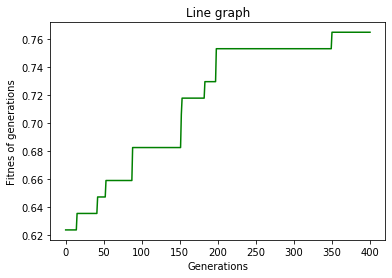

Best Individual after evalution
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
###############################
Fitness of best individual: 76%
###############################
Avarage Fitness after 10 rounds: 74.3


In [318]:
from IPython.display import clear_output

crossoverRate = 70  # 70 / 100 * 100 = 70%
mutationRate = 10  # 30 / 1000 * 100 = 3%
numberGenerations = 400
populationSize = 10

# Test 10 Rounds
accuracyEvalution = 0.0
numberRounds = 10 
for x in range (numberRounds):
    clear_output(wait=True)
    generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);
    
    fitnessBestRound = round(fitnessBest *100)
    accuracyEvalution = accuracyEvalution + fitnessBestRound

clear_output(wait=True)
generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);

# Plot Graph 
plotGraph(generations, numberGenerations+1)

print("Best Individual after evalution")
for row in bestOffspring:
    print(row)
    
print("###############################")
fitnessBest = round(fitnessBest *100)
print("Fitness of best individual: " + str(fitnessBest) + "%")
print("###############################")
result = accuracyEvalution / numberRounds
print("Avarage Fitness after 10 rounds: " + str(result))



I test 5 rounds:
    1. Rounds - score 73%
    2. Rounds - score 69%
    3. Rounds - score 69%
    4. Rounds - score 75%
    5. Rounds - score 68%
    
    Avarage Score: 72.4%

    


## Change population size - increase

Base parameters for our sytem will be:
1. Population Size - 50 individuals
2. Number of generations - 400 
3. Crossover rate = 70% 
4. Mutation rate = 1%

We increase population size of our experiment 

[[[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]], [[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0], [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]], [[1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]], [[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0

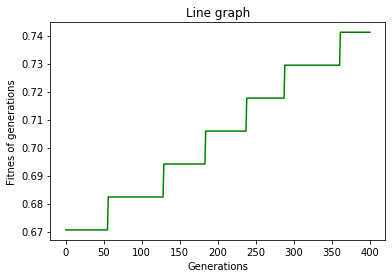

Best Individual after evalution
[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
###############################
Fitness of best individual: 74%
###############################
Avarage Fitness after 10 rounds: 76.0


In [317]:
from IPython.display import clear_output

crossoverRate = 70  # 70 / 100 * 100 = 70%
mutationRate = 10  # 30 / 1000 * 100 = 3%
numberGenerations = 400
populationSize = 50 # CHANGED !!!!!!!!!!!

# Test 10 Rounds
accuracyEvalution = 0.0
numberRounds = 10 
for x in range (numberRounds):
    clear_output(wait=True)
    generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);
    
    fitnessBestRound = round(fitnessBest *100)
    accuracyEvalution = accuracyEvalution + fitnessBestRound

clear_output(wait=True)
generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);


print("Change POPULATION SIZE")

# Plot Graph 
plotGraph(generations, numberGenerations+1)


print("Best Individual after evalution")
for row in bestOffspring:
    print(row)
    
print("###############################")
fitnessBest = round(fitnessBest *100)
print("Fitness of best individual: " + str(fitnessBest) + "%")
print("###############################")
result = accuracyEvalution / numberRounds
print("Avarage Fitness after 10 rounds: " + str(result))

(i DONT KNOW HOW TO STOP PRINTING SOME RANDOM OUTPUT)

Avarage Score: 76.8%



After increasing population size, there is visible trend of increase in stagnation regions during evalution proccess.
It is propably happening because Steady-State Binary GA is updating worst individual in a population and therefore evalution is happening on worst case basis , therfore this evalution strategy will be more efficient for smaller population sizes and groups

## Change mutation rate - increase

Base parameters for our sytem will be:
1. Population Size - 10 individuals
2. Number of generations - 400 
3. Crossover rate = 70% 
4. Mutation rate = 8%

We increase mutation rate of our experiment 

[[[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0], [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]], [[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]], [[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]], [[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1], [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0], [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1

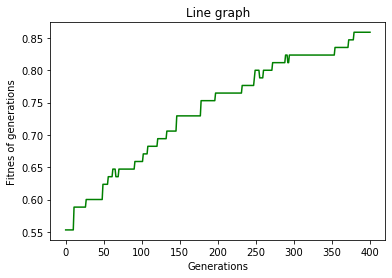

Best Individual after evalution
[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1]
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
###############################
Fitness of best individual: 86%
###############################
Avarage Fitness after 10 rounds: 88.5


In [319]:
from IPython.display import clear_output


crossoverRate = 70  # 70 / 100 * 100 = 70%
mutationRate = 80  # CHANGED !!!!!!!!!!!
numberGenerations = 400
populationSize = 10

# Test 10 Rounds
accuracyEvalution = 0.0
numberRounds = 10 
for x in range (numberRounds):
    clear_output(wait=True)
    generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);
    
    fitnessBestRound = round(fitnessBest *100)
    accuracyEvalution = accuracyEvalution + fitnessBestRound

clear_output(wait=True)
generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);

# Plot Graph 
plotGraph(generations, numberGenerations+1)
print("Change MUTATION RATE")

print("Best Individual after evalution")
for row in bestOffspring:
    print(row)
    
print("###############################")
fitnessBest = round(fitnessBest *100)
print("Fitness of best individual: " + str(fitnessBest) + "%")
print("###############################")
result = accuracyEvalution / numberRounds
print("Avarage Fitness after 10 rounds: " + str(result))



After increasing mutation rate accuracy of a system increases because individuals is much more faster going out from stagnation period 

Avarage Score: 88.5%


## Change crossover rate - increase

Base parameters for our sytem will be:
1. Population Size - 10 individuals 
2. Number of generations - 400 
3. Crossover rate = 90%  CHANGED !!!!!!!!!!!
4. Mutation rate = 1%

We increase crossover rate of our experiment 

[[[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]], [[1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]], [[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]], [[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1

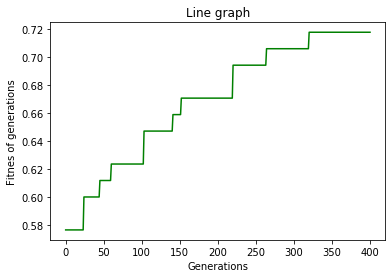

Best Individual after evalution
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0]
[1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
###############################
Fitness of best individual: 72%
###############################
Avarage Fitness after 10 rounds: 69.9


In [322]:
from IPython.display import clear_output


crossoverRate = 90 # CHANGED !!!!!!!!!!!
mutationRate = 10  # 30 / 1000 * 100 = 3%
numberGenerations = 400
populationSize = 10

# Test 10 Rounds
accuracyEvalution = 0.0
numberRounds = 10 
for x in range (numberRounds):
    clear_output(wait=True)
    generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);
    
    fitnessBestRound = round(fitnessBest *100)
    accuracyEvalution = accuracyEvalution + fitnessBestRound

clear_output(wait=True)
generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);
print("Change Crossover Rate")

# Plot Graph 
plotGraph(generations, numberGenerations+1)

print("Best Individual after evalution")
for row in bestOffspring:
    print(row)
    
print("###############################")
fitnessBest = round(fitnessBest *100)
print("Fitness of best individual: " + str(fitnessBest) + "%")
print("###############################")
result = accuracyEvalution / numberRounds
print("Avarage Fitness after 10 rounds: " + str(result))


After increasing crossover rate avarage fitness of program decreases. it is happening propably because less amount of good offsprings copied in a system and recombination happening between mid level offsprings

## Optimal solution,

Base parameters for our sytem will be:
1. Population Size - 10 individuals
2. Number of generations - 900 
3. Crossover rate = 70% 
4. Mutation rate =9%

We increase crossover rate of our experiment 

[[[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1], [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]], [[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1], [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]], [[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1], [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]], [[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0

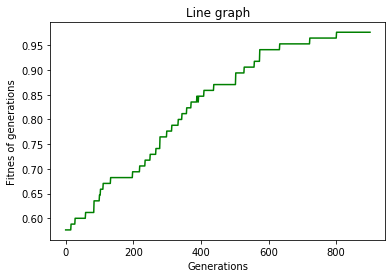

Best Individual after evalution
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]
[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
###############################
Fitness of best individual: 98%
###############################
Avarage Fitness after 10 rounds: 97.1


In [327]:
from IPython.display import clear_output

print("Optimal")

crossoverRate = 70  # 70 / 100 * 100 = 70%
mutationRate = 90  # 90 / 1000 * 100 = 9%
numberGenerations = 900
populationSize = 15

# Test 20 Rounds
accuracyEvalution = 0.0
numberRounds = 10 
for x in range (numberRounds):
    clear_output(wait=True)
    generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);
    
    fitnessBestRound = round(fitnessBest *100)
    accuracyEvalution = accuracyEvalution + fitnessBestRound

clear_output(wait=True)
generations, fitnessBest, bestOffspring = evalutionOFProblem(crossoverRate, mutationRate, numberGenerations, populationSize);

# Plot Graph 
plotGraph(generations, numberGenerations+1)

print("Best Individual after evalution")
for row in bestOffspring:
    print(row)
    
print("###############################")
fitnessBest = round(fitnessBest *100)
print("Fitness of best individual: " + str(fitnessBest) + "%")
print("###############################")
result = accuracyEvalution / numberRounds
print("Avarage Fitness after 10 rounds: " + str(result))

### Why do you think is the parameter combination successful?

I think that this combination successful because it is show quite stable progression during all time period without big areas of stagnation and with quite good linear trend.

### Are there any drawbacks when using the identified parameter combination?

THe main drawbacks is that we dont know the most optimal combination of Population Size, Number of generations, Crossover rate,
Mutation rate. It can be find only by test and trials of different options

## Part 3: Optimization Problem 

Step 1: Modify Fitness function in a library for Beale function

Beale function formula:

#### result = (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

Step 1: Update Fitness Function

In [379]:
import random
import collections

class steadyStateBinaryGAOptimization:

    def __init__(self, populationSize, genotypeRow, genotypeColumn):
        self.populationSize = populationSize
        self.genotypeRow = genotypeRow
        self.genotypeColumn = genotypeColumn
        self.populationArray = []
        self.populationEstimation = {}
        self.generateRandomPopulation()

    def generateRandomPopulation(self):

        for child in range(self.populationSize):
            newColumn = []
            for x in range(self.genotypeRow):
                newRow = []
                for y in range(self.genotypeColumn):
                    if random.randint(0, 100) < random.randint(0, 100):
                        newRow.append(0)
                    else:
                        newRow.append(1)
                newColumn.append(newRow)
            self.populationArray.append(newColumn)
        print(self.populationArray)
        return self.populationArray

    def estimateFitness(self, target):
        ## UPDATE
        # target is 16 bit, first 8 bit firt value, second 8 bit - second value 
        x = self.dec(target[0][:8]) - 127
        y = self.dec(target[0][8:]) - 127
        
        return -((1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2)

    def selection(self, firstIndividum, secondIndividum):
        counter = 0

        for individual in self.populationArray:
            individualFitness = self.estimateFitness(individual)
            self.populationEstimation[counter] = individualFitness
            counter = counter + 1

        self.populationEstimation = sorted(self.populationEstimation.items(), key=lambda kv: kv[1], reverse=True)
        # take choisen individum
        female = self.populationArray[self.populationEstimation[firstIndividum][0]]
        male = self.populationArray[self.populationEstimation[secondIndividum][0]]
        self.populationEstimation = self.Convert(self.populationEstimation)
        return female, male

    def crossover(self, female, male):

        offspring = []
        cut = random.randint(1, self.genotypeColumn - 1)  # randomy select cut point

        for x in range(self.genotypeRow):
            offspringRow = female[x][0:cut] + male[x][cut:]
            offspring.append(offspringRow)

        return offspring

    def mutation(self, offspring, numberMutationPoints):

        randomRowMutationPoint = 0  # randomy select cut point
        randomColumnMutationPoint = random.randint(0, self.genotypeColumn - 1)  # randomy select cut point

        if offspring[randomRowMutationPoint][randomColumnMutationPoint] == 0:
            offspring[randomRowMutationPoint][randomColumnMutationPoint] = 1
        else:
            offspring[randomRowMutationPoint][randomColumnMutationPoint] = 0

        return offspring

    def checkWorst(self, offspring):
        targetFitness = self.estimateFitness(offspring)
        currentWorstKey = list(self.populationEstimation.keys())[-1]
        currentWorstValue = self.populationEstimation[currentWorstKey]
        if currentWorstValue >= targetFitness:
            return True
        else:
            return False

    def replaceWorst(self, offspring):
        currentWorstKey = list(self.populationEstimation.keys())[-1]
        self.populationArray[currentWorstKey] = offspring

    def getBestOffspring(self):
        bestOffspringKey = list(self.populationEstimation.keys())[0]
        return self.populationArray[bestOffspringKey], self.populationEstimation[bestOffspringKey]

    def Convert(self, a):
        res_dct = dict(a)
        return res_dct
    
    def dec(self, chromosome):
        d = 0
        for i in range(len(chromosome)):
            if chromosome[i] == 1:
                d += 2**i
        return d



Step 2: a little bit update evaluation procces function

In [380]:
def evalutionOFProblemOptimization(crossoverRate, mutationRate, numberGenerations, populationSize):

    crossoverRate = crossoverRate  # 70 / 100 * 100 = 70%
    mutationRate = mutationRate  # 30 / 1000 * 100 = 3%
    numberGenerations = numberGenerations
    populationSize = populationSize
    generationBestArray = []
    BestResult = []
    
    # Make 16 bit representation
    program = steadyStateBinaryGAOptimization(populationSize, 1, 16,)

    currentGeneration = 0
    while currentGeneration <= numberGenerations:

        selectBestMale = 0
        selectBestFemale = 1

        while True:

            female, male = program.selection(selectBestMale, selectBestFemale)

            r = random.randrange(0, 100)

            if r < crossoverRate:
                offspring = program.crossover(female, male)
            else:
                offspring, estimation = program.getBestOffspring()

            r = random.randrange(0, 1000)
            numberOFMutationPoints = random.randrange(1, 5)

            if r < mutationRate:
                offspring = program.mutation(offspring, numberOFMutationPoints)

            if program.checkWorst(offspring) and not (selectBestFemale >= populationSize - 1):
                selectBestMale = selectBestMale + 1
                selectBestFemale = selectBestFemale + 1
            else:
                program.replaceWorst(offspring)
                break

        currentBestOffspring, estimation = program.getBestOffspring()
        generationBestArray.append(estimation)
        currentGeneration = currentGeneration + 1
        if currentGeneration >= numberGenerations:
            BestResult = currentBestOffspring

    return generationBestArray, generationBestArray[-1], BestResult

Step 3: Test

[[[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]], [[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]], [[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]], [[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]], [[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]], [[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]], [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]], [[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]], [[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1]], [[0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]]]


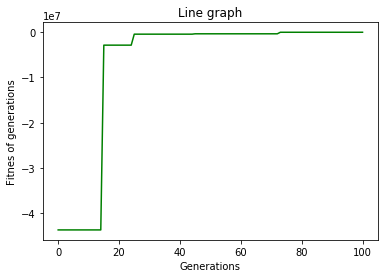

[[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]]
Best Individual after evalution
X variable = 128 Y variable = 129


In [419]:
from IPython.display import clear_output

def dec(chromosome):
    d = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1:
            d += 2**i
    return d

print("Optimal")

crossoverRate = 80  # 70 / 100 * 100 = 70%
mutationRate = 70  # 90 / 1000 * 100 = 9%
numberGenerations = 100
populationSize = 10


clear_output(wait=True)
generations, fitnessBest, bestOffspring = evalutionOFProblemOptimization(crossoverRate, mutationRate, numberGenerations, populationSize);

# Plot Graph 
plotGraph(generations, numberGenerations+1)

print(bestOffspring)

print("Best Individual after evalution")
print("X variable = " + str(dec(bestOffspring[0][:8])) + " Y variable = " + str(dec(bestOffspring[0][8:])))
    


## Briefly describe and discuss the behaviour of the GA. 

GA is trying to maximaze function output, we constract fitness function in a way that it display output in negative format bet GA is trying to maximize it to get fitness result closer to 0 our max point

## Which representation did you use?
I was using binary representation for this problem, chromosome consist of 2 genes, first gene represent X vale, second gene represent Y value

## Did the GA find the minimum or maximum?

Yes, GA has come veru close to final value X variable = 128 Y variable = 129

## Did you have to adjust the hyper-parameters?
Yes, I change number of generations and increase mutation rate

## How can you improve the solution?
I can immprove solution by asking GA not to do search till some number of generations bet instead of it find till fitness will be equal 0. Also better solution can be found in real value data range, therefore program have potential to be improved

# Part 5: Self-assessment:

Part 1 - I think I made good job, I have shown step by step implementation of Steady-State Binary GA and created library in OOP style. -I create implementation which is able to come closer than 96% to goal value, I think that it is very good solution

PArt 2 -I tried to change and explain 3 Hyper-parameter: population size, generations, crossover rate and mutation rate, therefore it must be enough for good mark

Part 3 - I adapted code from part 1 and 2 to take integer value bet not bite images, also fitness function is come very close to 0, therefore soluton must be good, bet I havent done one constrained optimisation function due to lack of time

Part 4 - I would like to do part 4 bet I dont have time for it